In [ ]:
!pip install google-ml-edu==0.1.3 \
  keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow --quiet

In [ ]:
import numpy as np
import pandas as pd
import keras
import ml_edu.experiment
import ml_edu.results
import plotly.express as px

In [ ]:
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

In [ ]:
training_df = chicago_taxi_dataset.loc[:, ('TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE')]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


In [ ]:
#@title Code - View dataset statistics

print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In [ ]:


# What is the maximum fare?
max_fare = training_df['FARE'].max()
print("What is the maximum fare? 				Answer: ${fare:.2f}".format(fare = max_fare))

# What is the mean distance across all trips?
mean_distance = training_df['TRIP_MILES'].mean()
print("What is the mean distance across all trips? 		Answer: {mean:.4f} miles".format(mean = mean_distance))

# How many cab companies are in the dataset?
num_unique_companies =  training_df['COMPANY'].nunique()
print("How many cab companies are in the dataset? 		Answer: {number}".format(number = num_unique_companies))

# What is the most frequent payment type?
most_freq_payment_type = training_df['PAYMENT_TYPE'].value_counts().idxmax()
print("What is the most frequent payment type? 		Answer: {type}".format(type = most_freq_payment_type))

# Are any features missing data?
missing_values = training_df.isnull().sum().sum()
print("Are any features missing data? 				Answer:", "No" if missing_values == 0 else "Yes")

What is the maximum fare? 				Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		Answer: 31
What is the most frequent payment type? 		Answer: Credit Card
Are any features missing data? 				Answer: No


In [ ]:

training_df.corr(numeric_only = True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


In [ ]:

px.scatter_matrix(training_df, dimensions=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

In [ ]:


def create_model(
    settings: ml_edu.experiment.ExperimentSettings,
    metrics: list[keras.metrics.Metric],
) -> keras.Model:
  inputs = {name: keras.Input(shape=(1,), name=name) for name in settings.input_features}
  concatenated_inputs = keras.layers.Concatenate()(list(inputs.values()))
  outputs = keras.layers.Dense(units=1)(concatenated_inputs)
  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate),
                loss="mean_squared_error",
                metrics=metrics)

  return model


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    label_name: str,
    settings: ml_edu.experiment.ExperimentSettings,
) -> ml_edu.experiment.Experiment:

  features = {name: dataset[name].values for name in settings.input_features}
  label = dataset[label_name].values
  history = model.fit(x=features,
                      y=label,
                      batch_size=settings.batch_size,
                      epochs=settings.number_epochs)

  return ml_edu.experiment.Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 161.3940 - rmse: 12.6722
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 43.0971 - rmse: 6.5378
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18.4638 - rmse: 4.2935
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.3083 - rmse: 4.3884
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.9060 - rmse: 4.1095
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.6326 - rmse: 3.8206
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.3294 - rmse: 3.9066
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.1735 - rmse: 3.7611
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.6726 - rmse: 3.8241
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.4285 - rmse: 3.6616
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13.8874 - rmse: 3.7213
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13.5309 - rmse: 3.6750

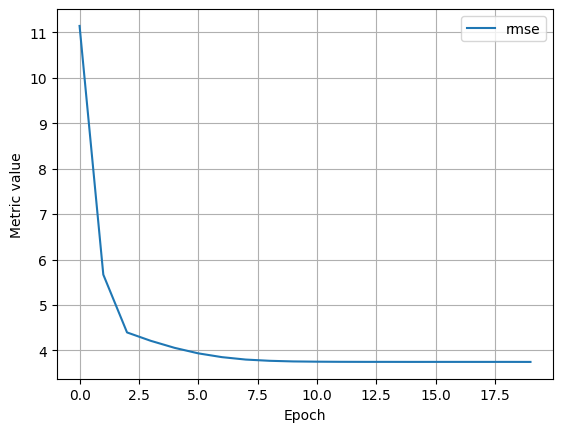

In [ ]:

settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 58.1308 - rmse: 7.4495
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 49.4259 - rmse: 7.0180
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 47.9500 - rmse: 6.9174
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 46.6830 - rmse: 6.8297
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 46.2526 - rmse: 6.7780
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 48.2275 - rmse: 6.9382
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46.1968 - rmse: 6.7908
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47.1256 - rmse: 6.8611
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 49.4752 - rmse: 7.0278
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 47.6512 - rmse: 6.8992
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 44.4603 - rmse: 6.6489
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47.8681 - rmse: 6.9110
E

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


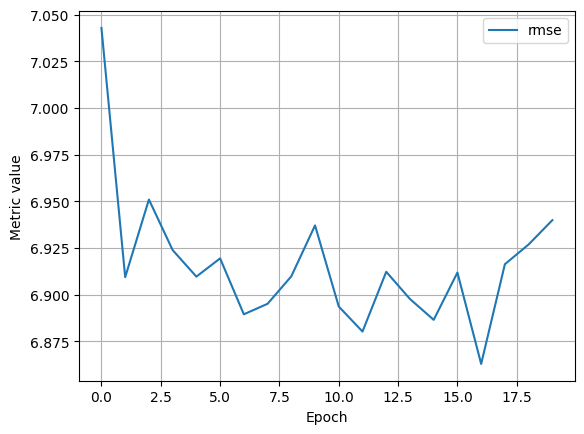

In [ ]:

settings_2 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 1.0,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_2 = create_model(settings_2, metrics)

experiment_2 = train_model('one_feature_hyper', model_2, training_df, 'FARE', settings_2)

ml_edu.results.plot_experiment_metrics(experiment_2, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_2, training_df, 'FARE')

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1871.3508 - rmse: 43.2586
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1815.3777 - rmse: 42.6046
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1760.3260 - rmse: 41.9551
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1705.3204 - rmse: 41.2915
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1627.2428 - rmse: 40.3380
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1573.5442 - rmse: 39.6642
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1518.5782 - rmse: 38.9674
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1448.7383 - rmse: 38.0606
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1395.0698 - rmse: 37.3495
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1344.7262 - rmse: 36.6696
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1283.8545 - rmse: 35.8274
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


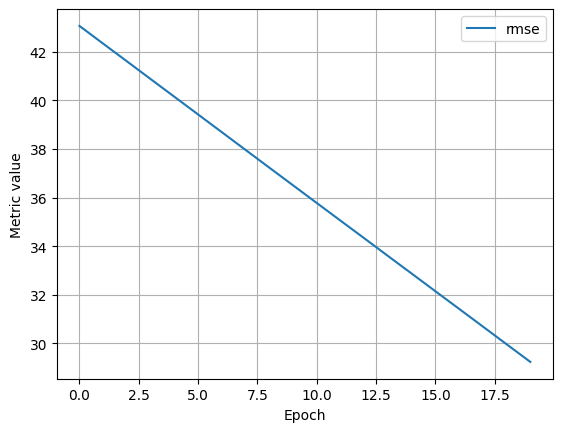

In [ ]:

settings_2 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.0001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_2 = create_model(settings_2, metrics)

experiment_5 = train_model('one_feature_hyper', model_2, training_df, 'FARE', settings_2)

ml_edu.results.plot_experiment_metrics(experiment_5, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_5, training_df, 'FARE')

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1165.2874 - rmse: 34.1351
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1107.7860 - rmse: 33.2825
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1053.6448 - rmse: 32.4591
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1023.6981 - rmse: 31.9935
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 968.3850 - rmse: 31.1183
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 917.1622 - rmse: 30.2841
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 885.7436 - rmse: 29.7595
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 828.8619 - rmse: 28.7894
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 789.9374 - rmse: 28.1052
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 742.9170 - rmse: 27.2561
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 711.2015 - rmse: 26.6679
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 665.2871 - rmse: 25.79

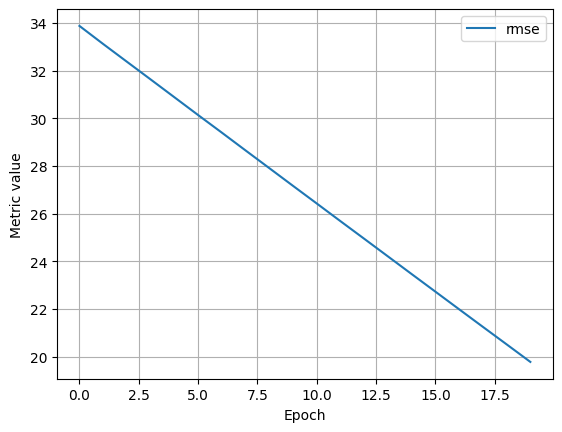

In [ ]:

# TODO - Adjust these hyperparameters to see how they impact a training run.
settings_2 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 500,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_2 = create_model(settings_2, metrics)

experiment_4 = train_model('one_feature_hyper', model_2, training_df, 'FARE', settings_2)

ml_edu.results.plot_experiment_metrics(experiment_4, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_4, training_df, 'FARE')

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 297.4773 - rmse: 17.0816
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 36.8950 - rmse: 6.0689
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26.4500 - rmse: 5.1262
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.7807 - rmse: 3.9711
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 15.6682 - rmse: 3.9514
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.3929 - rmse: 3.5160
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.2272 - rmse: 3.3462
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.3593 - rmse: 3.3545
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.7655 - rmse: 3.4110
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.7579 - rmse: 3.4239
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.3696 - rmse: 3.3648
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.0198 - rmse: 3.6023

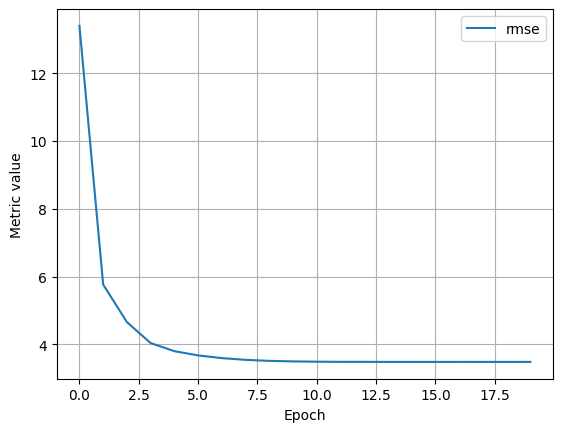

In [ ]:

settings_3 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES', 'TRIP_MINUTES']
)

training_df['TRIP_MINUTES'] = training_df['TRIP_SECONDS']/60

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_3 = create_model(settings_3, metrics)

experiment_3 = train_model('two_features', model_3, training_df, 'FARE', settings_3)

ml_edu.results.plot_experiment_metrics(experiment_3, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_3, training_df, 'FARE')

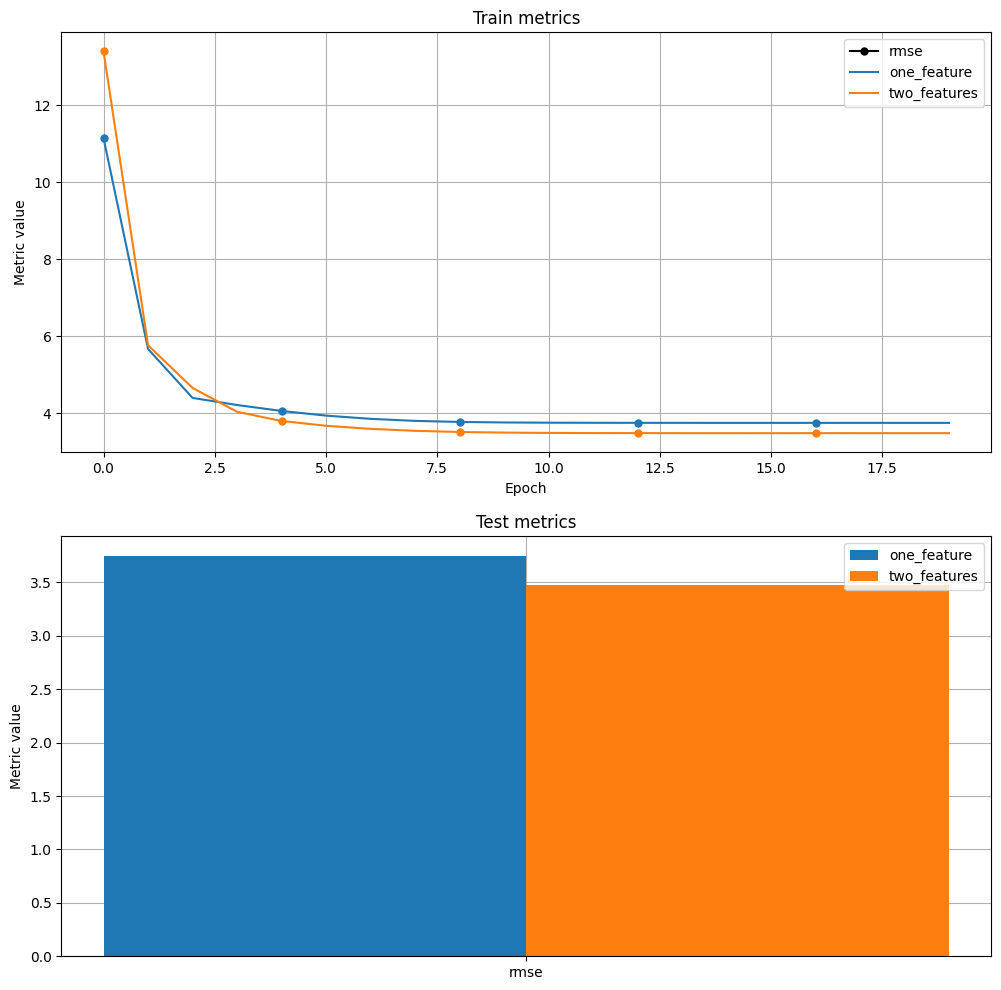

In [ ]:
ml_edu.results.compare_experiment([experiment_1, experiment_3], ['rmse'], training_df, training_df['FARE'].values)

In [ ]:

def format_currency(x):
  return "${:.2f}".format(x)

def build_batch(df, batch_size):
  batch = df.sample(n=batch_size).copy()
  batch.set_index(np.arange(batch_size), inplace=True)
  return batch

def predict_fare(model, df, features, label, batch_size=50):
  batch = build_batch(df, batch_size)
  predicted_values = model.predict_on_batch(x={name: batch[name].values for name in features})

  data = {"PREDICTED_FARE": [], "OBSERVED_FARE": [], "L1_LOSS": [],
          features[0]: [], features[1]: []}
  for i in range(batch_size):
    predicted = predicted_values[i][0]
    observed = batch.at[i, label]
    data["PREDICTED_FARE"].append(format_currency(predicted))
    data["OBSERVED_FARE"].append(format_currency(observed))
    data["L1_LOSS"].append(format_currency(abs(observed - predicted)))
    data[features[0]].append(batch.at[i, features[0]])
    data[features[1]].append("{:.2f}".format(batch.at[i, features[1]]))

  output_df = pd.DataFrame(data)
  return output_df

def show_predictions(output):
  header = "-" * 80
  banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header
  print(banner)
  print(output)
  return

In [ ]:
#@title Code - Make predictions

output = predict_fare(experiment_3.model, training_df, experiment_3.settings.input_features, 'FARE')
show_predictions(output)

--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_FARE OBSERVED_FARE L1_LOSS  TRIP_MILES TRIP_MINUTES
0           $6.55         $5.75   $0.80        1.03         4.20
1          $12.23        $11.50   $0.73        3.40        10.00
2          $10.45         $9.50   $0.95        2.60         9.00
3          $45.46        $47.00   $1.54       18.00        34.00
4          $12.42        $13.19   $0.77        3.27        13.05
5           $7.52         $7.00   $0.52        1.30         7.00
6          $38.18        $32.48   $5.70       14.50        32.77
7          $46.59        $46.50   $0.09       18.65        32.72
8           $6.45         $5.75   $0.70        0.86         5.82
9          $34.41        $34.50   $0.09       12.99        28.12
10         $15.34        $14.75   $0.59   